In [1]:
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import shutil
import posixpath
import wfdb
import os

In [3]:
# Download all the WFDB records and annotations from a small PhysioNet Database

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'database')

# Download all the WFDB content
wfdb.dl_database('mitdb', dl_dir=dl_dir)

# Cleanup: delete the downloaded directory
# shutil.rmtree(dl_dir)

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

In [4]:
for dirname, _, filenames in os.walk('database'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
       

database\100.atr
database\100.dat
database\100.hea
database\101.atr
database\101.dat
database\101.hea
database\102.atr
database\102.dat
database\102.hea
database\103.atr
database\103.dat
database\103.hea
database\104.atr
database\104.dat
database\104.hea
database\105.atr
database\105.dat
database\105.hea
database\106.atr
database\106.dat
database\106.hea
database\107.atr
database\107.dat
database\107.hea
database\108.atr
database\108.dat
database\108.hea
database\109.atr
database\109.dat
database\109.hea
database\111.atr
database\111.dat
database\111.hea
database\112.atr
database\112.dat
database\112.hea
database\113.atr
database\113.dat
database\113.hea
database\114.atr
database\114.dat
database\114.hea
database\115.atr
database\115.dat
database\115.hea
database\116.atr
database\116.dat
database\116.hea
database\117.atr
database\117.dat
database\117.hea
database\118.atr
database\118.dat
database\118.hea
database\119.atr
database\119.dat
database\119.hea
database\121.atr
database\121.d

In [5]:
train_data = pd.read_csv('mitbih_train.csv')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, F1 to Label
dtypes: float64(187), int64(1)
memory usage: 125.6 MB


In [7]:
test_data = pd.read_csv('mitbih_test.csv')

In [8]:
#check the null values
train_data.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
        ..
F184     0
F185     0
F186     0
F187     0
Label    0
Length: 188, dtype: int64

In [9]:
#import machine learning modules
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from warnings import simplefilter
from sklearn.metrics import confusion_matrix

In [10]:
X = train_data.drop(['Label'], axis=1)
y= train_data.Label

In [11]:
X_test = test_data.drop(['Label'], axis=1)
y_test = test_data.Label

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, F1 to Label
dtypes: float64(187), int64(1)
memory usage: 31.4 MB


In [13]:
#training the model
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3)

In [14]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (61287, 187)
Test shape: (26267, 187)


In [15]:
print(y_train.value_counts(), y_test.value_counts())

0    50729
4     4502
2     4051
1     1556
3      449
Name: Label, dtype: int64 0    21742
4     1929
2     1737
1      667
3      192
Name: Label, dtype: int64


In [16]:
#choose a model
modelwaxun = RandomForestClassifier()
#fit the model
modelwaxun.fit(X_train, y_train)
#prediction
y_predicted = modelwaxun.predict(X_test)

In [17]:
from sklearn.metrics import classification_report
#evaluate the model
cv_score = cross_val_score(modelwaxun, X_train, y_train, cv=3)
print('cv_score:', cv_score)
##classification
print(classification_report(y_test, y_predicted))

cv_score: [0.97214744 0.97258799 0.97239219]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     21742
           1       0.98      0.60      0.74       667
           2       0.97      0.88      0.93      1737
           3       0.93      0.56      0.70       192
           4       0.99      0.96      0.98      1929

    accuracy                           0.97     26267
   macro avg       0.97      0.80      0.87     26267
weighted avg       0.97      0.97      0.97     26267



In [18]:
#Make a prediction using the model and the data test_data.( column label is the target and it was dropped)
test_predictions = modelwaxun.predict(X_test)

In [19]:
test_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
# accuracy of the model prediction using accuracy score
print('accuracy score: ' , accuracy_score(y_test, test_predictions))

accuracy score:  0.974416568317661


In [21]:
# visualize the confusion matrix
print('Confusion matrix:\n', confusion_matrix(y_test, y_predicted, labels=[0,1,2,3,4]))
print( 'values:\n',y_test.value_counts())

Confusion matrix:
 [[21705     7    23     1     6]
 [  259   400     7     0     1]
 [  192     0  1533     7     5]
 [   73     0    12   107     0]
 [   79     0     0     0  1850]]
values:
 0    21742
4     1929
2     1737
1      667
3      192
Name: Label, dtype: int64


In [23]:
# check performance for support vector machine
model = SVC(kernel='rbf') # SVC(kernel='linear') #
model.fit(X_train, y_train)
y_predicted= model.predict(X_test)
# compute the accuracy
print(accuracy_score(y_test, y_predicted))
# does accuracy tell everything?- No
# visualize the confusion matrix
confusion_matrix(y_test, y_predicted, labels=[0,1,2,3,4])

0.9669928046598394


array([[21691,     9,    35,     2,     5],
       [  283,   378,     6,     0,     0],
       [  234,     0,  1468,    29,     6],
       [  104,     0,    10,    78,     0],
       [  138,     0,     6,     0,  1785]], dtype=int64)

In [24]:
#Make a prediction using the model and the data test_data.( column label is the target and it was dropped)
test_pred = model.predict(X_test)
print('accuracy score: ' , accuracy_score(y_test, test_pred))

accuracy score:  0.9669928046598394


import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


# Create the RFE object and compute a cross-validated score.
model_rf = RandomForestClassifier()
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=model_rf, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [25]:
!pip install neurokit2

In [26]:
# add the files in a folder
files = os.listdir(dl_dir)
all_records = []
for file in files:
    record = file.split('.',1)[0]
    if record not in all_records and record[-1] != 'r':
        all_records.append(record)

In [27]:
import wfdb
from wfdb import processing
import matplotlib.pyplot as plt
import matplotlib

# Load the WFDB record 10 sec segment and the physical samples
all_results = [] # list will contain all the record
records = []
results = {}
for record in all_records:
    patient = wfdb.rdrecord('database/{}'.format(record), sampfrom=0, sampto=10000)
    all_results.append(patient.__dict__)
    records.append(patient) # list of all the record that can be used to visualise the R pick
print(all_results)


[{'record_name': '100', 'n_sig': 2, 'fs': 360, 'counter_freq': None, 'base_counter': None, 'sig_len': 10000, 'base_time': None, 'base_date': None, 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'], 'sig_name': ['MLII', 'V5'], 'p_signal': array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [ 0.71 ,  0.32 ],
       [ 0.795,  0.045],
       [ 0.72 , -0.26 ]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['100.dat', '100.dat'], 'fmt': ['212', '212'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [200.0, 200.0], 'baseline': [1024, 1024], 'units': ['mV', 'mV'], 'adc_res': [11, 11], 'adc_zero': [1024, 1024], 'init_value': [995, 1011], 'checksum': [8548, 60086], 'block_size': [0, 0]}, {'record_name': '101', 'n_sig': 2, 'fs': 360, 'counter_freq': None, 'base_counter': None, 'sig_len': 10000, 'base_time': None, 'base_date': None, 'comments': ['75 F 1011 654 x1', 'Diapres'], 'sig_n

In [30]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

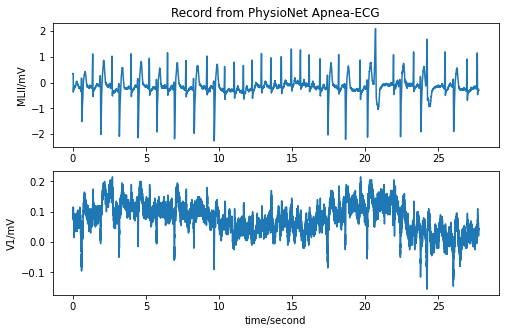

{'record_name': '200',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 10000,
 'base_time': None,
 'base_date': None,
 'comments': ['64 M 1953 3655 x1',
  'Digoxin, Quinidine',
  'The PVCs are multiform.  There are occasional bursts of high-frequency',
  'noise in the upper channel, and severe noise and artifact in the lower',
  'channel.'],
 'sig_name': ['MLII', 'V1'],
 'p_signal': array([[ 0.35 ,  0.105],
        [ 0.35 ,  0.105],
        [ 0.35 ,  0.105],
        ...,
        [-0.265,  0.045],
        [-0.28 ,  0.04 ],
        [-0.3  ,  0.045]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['200.dat', '200.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [1094, 1045],
 'checksum': [1067, 41168],
 'block_size': [0, 

In [35]:
import wfdb
from wfdb import processing
import matplotlib.pyplot as plt
import matplotlib
# Load the WFDB record 10 sec segment and the physical samples
#for record in all_records:
    #patient_record = wfdb.rdrecord('database/{}'. format(record), sampfrom=0, sampto=10000)
    
record = wfdb.rdrecord('database/200', sampfrom=0, sampto=10000) # select one record to see
wfdb.plot_wfdb(record=record, time_units='seconds', title='Record patient 200') 
display(patient_record.__dict__)

# Now load the entire duration of the signal and get r peaks
#all_wfdb = []
#for record in all_records:
    #print(record)
    #all_wfdb.append(wfdb.rdrecord('database/{}'.format(record), sampfrom=0,sampto=10000))
# ind= biosppy.signals.ecg.ecg(record.p_signal[:,0], sampling_rate=100, show=False)
#wfdb.plot_wfdb(record=record, time_units='seconds', title='Record from PhysioNet Apnea-ECG') 
#display(record.__dict__)

In [50]:
# Extract R-peaks locations
#for record in all_records:
#records / i used record 200 . But can create a loop for 234 record
ecg_signal = patient.p_signal[:,0]
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=360)

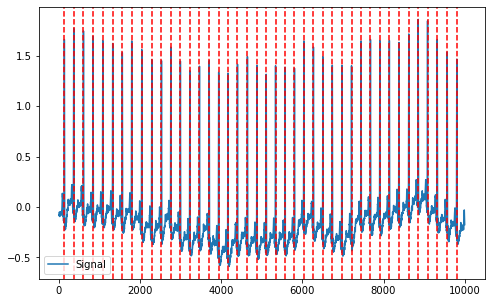

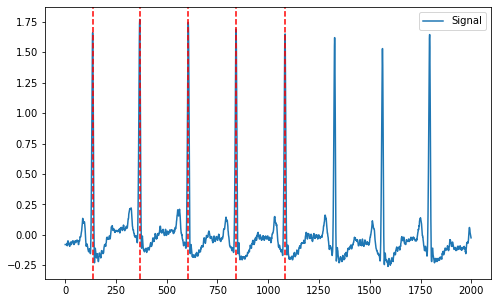

In [51]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)
# Zooming into the first 5 R-peaks 
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:2000])

In [42]:
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=2000, method="peak")

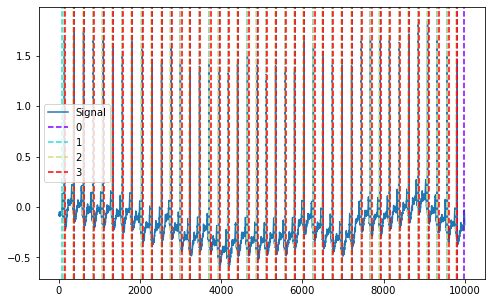

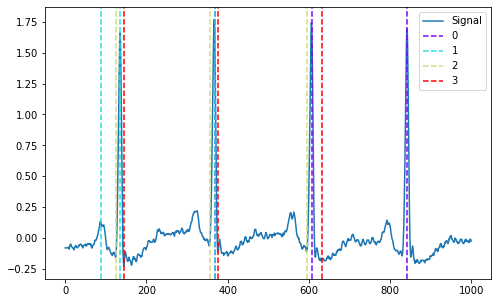

In [44]:
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg_signal)

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3],
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal[:1000])

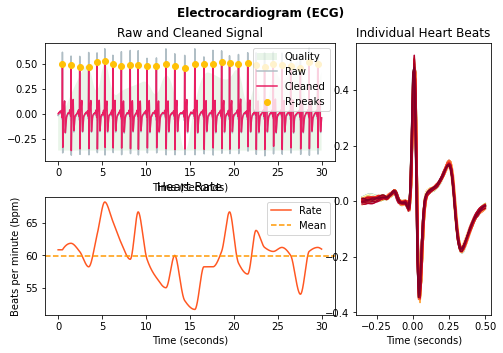

In [54]:
#download a waves frequences
data = nk.data("bio_eventrelated_100hz")
ecg_signals, info = nk.ecg_process(data["ECG"], sampling_rate=100)
plot = nk.ecg_plot(ecg_signals[:3000], sampling_rate=100)

In [55]:
#extract the features
nk.ecg_intervalrelated(ecg_signals)

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,60.896029,98.589404,8.492563,NaN,NaN,NaN,NaN,NaN,NaN,7.292462,...,2.227622,4.858786,1.317058,0.0,1.343221,1.93104,1.420937,1.836066,3.373242,1.150475


In [56]:
nk.ecg_intervalrelated(ecg_signals).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 78 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ECG_Rate_Mean            1 non-null      float64
 1   HRV_MeanNN               1 non-null      float64
 2   HRV_SDNN                 1 non-null      float64
 3   HRV_SDANN1               0 non-null      float64
 4   HRV_SDNNI1               0 non-null      float64
 5   HRV_SDANN2               0 non-null      float64
 6   HRV_SDNNI2               0 non-null      float64
 7   HRV_SDANN5               0 non-null      float64
 8   HRV_SDNNI5               0 non-null      float64
 9   HRV_RMSSD                1 non-null      float64
 10  HRV_SDSD                 1 non-null      float64
 11  HRV_CVNN                 1 non-null      float64
 12  HRV_CVSD                 1 non-null      float64
 13  HRV_MedianNN             1 non-null      float64
 14  HRV_MadNN                1 non

In [57]:
nk.ecg_intervalrelated(ecg_signals).columns

Index(['ECG_Rate_Mean', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_SDANN1', 'HRV_SDNNI1',
       'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_RMSSD',
       'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN',
       'HRV_MCVNN', 'HRV_IQRNN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_HTI',
       'HRV_TINN', 'HRV_ULF', 'HRV_VLF', 'HRV_LF', 'HRV_HF', 'HRV_VHF',
       'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2',
       'HRV_SD1SD2', 'HRV_S', 'HRV_CSI', 'HRV_CVI', 'HRV_CSI_Modified',
       'HRV_PIP', 'HRV_IALS', 'HRV_PSS', 'HRV_PAS', 'HRV_GI', 'HRV_SI',
       'HRV_AI', 'HRV_PI', 'HRV_C1d', 'HRV_C1a', 'HRV_SD1d', 'HRV_SD1a',
       'HRV_C2d', 'HRV_C2a', 'HRV_SD2d', 'HRV_SD2a', 'HRV_Cd', 'HRV_Ca',
       'HRV_SDNNd', 'HRV_SDNNa', 'HRV_DFA_alpha1', 'HRV_DFA_alpha1_ExpRange',
       'HRV_DFA_alpha1_ExpMean', 'HRV_DFA_alpha1_DimRange',
       'HRV_DFA_alpha1_DimMean', 'HRV_DFA_alpha2', 'HRV_DFA_alpha2_ExpRange',
       'HRV_DFA_alpha2_ExpMean', 'HRV_DFA_alpha2_Di

In [59]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = train_data
X = train_data.iloc[:,0:20]  #independent columns
y = train_data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs        Score
3     F4  4869.448708
4     F5  3832.030801
5     F6  2303.383603
6     F7  1774.245507
7     F8  1230.156271
2     F3   856.204707
8     F9   762.886328
13   F14   617.579435
12   F13   614.940273
11   F12   599.464570


in my opinion part of the features could be set

In [58]:
X = ['ECG_Rate_Mean', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_SDANN1', 'HRV_SDNNI1',
       'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_RMSSD',
       'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN',
       'HRV_MCVNN', 'HRV_IQRNN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_HTI',
       'HRV_TINN', 'HRV_ULF', 'HRV_VLF', 'HRV_LF', 'HRV_HF', 'HRV_VHF',
       'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2',
       'HRV_SD1SD2', 'HRV_S', 'HRV_CSI', 'HRV_CVI', 'HRV_CSI_Modified',
       'HRV_PIP', 'HRV_IALS', 'HRV_PSS', 'HRV_PAS', 'HRV_GI', 'HRV_SI',
       'HRV_AI', 'HRV_PI', 'HRV_C1d', 'HRV_C1a', 'HRV_SD1d', 'HRV_SD1a',
       'HRV_C2d', 'HRV_C2a', 'HRV_SD2d', 'HRV_SD2a', 'HRV_Cd', 'HRV_Ca',
       'HRV_SDNNd', 'HRV_SDNNa', 'HRV_DFA_alpha1', 'HRV_DFA_alpha1_ExpRange',
       'HRV_DFA_alpha1_ExpMean', 'HRV_DFA_alpha1_DimRange',
       'HRV_DFA_alpha1_DimMean', 'HRV_DFA_alpha2', 'HRV_DFA_alpha2_ExpRange',
       'HRV_DFA_alpha2_ExpMean', 'HRV_DFA_alpha2_DimRange',
       'HRV_DFA_alpha2_DimMean', 'HRV_ApEn', 'HRV_SampEn', 'HRV_ShanEn',
       'HRV_FuzzyEn', 'HRV_MSE', 'HRV_CMSE', 'HRV_RCMSE', 'HRV_CD', 'HRV_HFD',
       'HRV_KFD', 'HRV_LZC']

In [ ]:
# could redefine the model with this new features
# the list [all_results] is also a list of features